In [154]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
# Import dataframe from csv
df = pd.read_csv("data/world_ind_pop_data.csv", delimiter=',')

# Not all country code is refered to country in the csv, 
# Need to check against full list of countries in world
valid_country_codes = ['AFG','ALB','DZA','ASM','AND','AGO','AIA','ATA','ATG','ARG','ARM','ABW',
                       'AUS','AUT','AZE','BHS','BHR','BGD','BRB','BLR','BEL','BLZ','BEN','BMU',
                       'BTN','BOL','BIH','BWA','BRA','IOT','VGB','BRN','BGR','BFA','BDI','KHM',
                       'CMR','CAN','CPV','CYM','CAF','TCD','CHL','CHN','CXR','CCK','COL','COM',
                       'COK','CRI','HRV','CUB','CUW','CYP','CZE','COD','DNK','DJI','DMA','DOM',
                       'TLS','ECU','EGY','SLV','GNQ','ERI','EST','ETH','FLK','FRO','FJI','FIN',
                       'FRA','PYF','GAB','GMB','GEO','DEU','GHA','GIB','GRC','GRL','GRD','GUM',
                       'GTM','GGY','GIN','GNB','GUY','HTI','HND','HKG','HUN','ISL','IND','IDN',
                       'IRN','IRQ','IRL','IMN','ISR','ITA','CIV','JAM','JPN','JEY','JOR','KAZ',
                       'KEN','KIR','XKX','KWT','KGZ','LAO','LVA','LBN','LSO','LBR','LBY','LIE',
                       'LTU','LUX','MAC','MKD','MDG','MWI','MYS','MDV','MLI','MLT','MHL','MRT',
                       'MUS','MYT','MEX','FSM','MDA','MCO','MNG','MNE','MSR','MAR','MOZ','MMR',
                       'NAM','NRU','NPL','NLD','ANT','NCL','NZL','NIC','NER','NGA','NIU','PRK',
                       'MNP','NOR','OMN','PAK','PLW','PSE','PAN','PNG','PRY','PER','PHL','PCN',
                       'POL','PRT','PRI','QAT','COG','REU','ROU','RUS','RWA','BLM','SHN','KNA',
                       'LCA','MAF','SPM','VCT','WSM','SMR','STP','SAU','SEN','SRB','SYC','SLE',
                       'SGP','SXM','SVK','SVN','SLB','SOM','ZAF','KOR','SSD','ESP','LKA','SDN',
                       'SUR','SJM','SWZ','SWE','CHE','SYR','TWN','TJK','TZA','THA','TGO','TKL',
                       'TON','TTO','TUN','TUR','TKM','TCA','TUV','VIR','UGA','UKR','ARE','GBR',
                       'USA','URY','UZB','VUT','VAT','VEN','VNM','WLF','ESH','YEM','ZMB','ZWE']

# Filter rows, we need only those with real country code
df = df[df['CountryCode'].isin(valid_country_codes)]

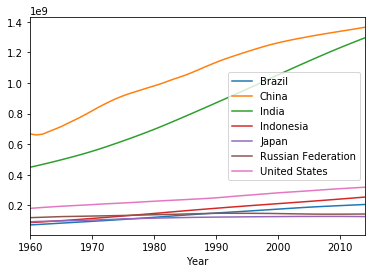

In [156]:
# Get top 5 countries in the past, probably more than 5 if top 5 are different for different years
def get_top_5_candidates_over_years(df):
    all_years = set(df['Year'])
    candidates = set([])
    for year in all_years:
        df_selected_year = df[df['Year'] == year]
        df_top_5 = df_selected_year.groupby(['CountryName']).sum().sort_values(by='Total Population', ascending=False).head(5)
        for country in list(df_top_5.index):
            candidates.add(country)
    return list(candidates)

# Create dataframe that consists top 5 countries in the past
top_5_countries = get_top_5_candidates_over_years(df)
df_top_5_countries = df[df['CountryName'].isin(top_5_countries)]

# Use groupby technique to isolate time series by country and plot on the same graph
fig, ax = plt.subplots(1, 1)
for name, group in df_top_5_countries.groupby("CountryName"):
    group.plot(ax=ax, x="Year", y="Total Population", label=name)
plt.show()